# Flight Price Prediction
Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects

In [1]:
from pyforest import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_excel("C:/Users/Ranjit M/Downloads/Flight_Ticket_Participant_Datasets-20190305T100527Z-001 (1)/Flight_Ticket_Participant_Datasets/Data_Train.xlsx")

<IPython.core.display.Javascript object>

In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
pd.set_option('display.max_columns', None)

<IPython.core.display.Javascript object>

In [5]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
#checking the Shape Of the Dataset 
df_train.shape

(10683, 11)

In [7]:
#checking the Info of the Dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
#checking the Columns Name
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
#checking the Datatypes of te columns
df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
#We can see 2 types of data types Int and Object

In [11]:
#checking the Null Values in the Dataset

df_train.isnull().values.any()

True

In [12]:
#From above Result we can see that we have some NaN values in our dataset
#so lets see it

df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
#lets Handel the Nan Values 
df_train['Route'].fillna(df_train['Route'].mode()[0],inplace=True)
df_train['Total_Stops'].fillna(df_train['Total_Stops'].mode()[0],inplace=True)

<IPython.core.display.Javascript object>

<AxesSubplot:>

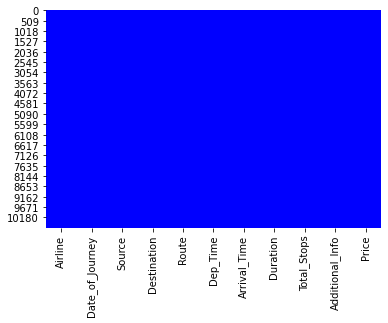

In [14]:
#lets See Again The Nan Values 
sns.heatmap(df_train.isnull(),cbar=False,cmap='winter')

# EDA

In [15]:
for i in df_train.columns:
    if df_train[i].dtypes=='O':
        val=df_train[i].value_counts()
        print(val)
        print("******************************")
        

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
******************************
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03

In [16]:
df_train["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
19h 50m      1
33h 45m      1
31h 30m      1
29h 40m      1
5m           1
Name: Duration, Length: 368, dtype: int64

In [17]:
df_train["Journey_day"] = pd.to_datetime(df_train.Date_of_Journey, format="%d/%m/%Y").dt.day

<IPython.core.display.Javascript object>

In [18]:
df_train["Journey_day"]

0        24
1         1
2         9
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: Journey_day, Length: 10683, dtype: int64

In [19]:
df_train["Journey_month"] = pd.to_datetime(df_train["Date_of_Journey"], format = "%d/%m/%Y").dt.month

<IPython.core.display.Javascript object>

In [20]:
df_train["Journey_year"] = pd.to_datetime(df_train["Date_of_Journey"], format = "%d/%m/%Y").dt.year

<IPython.core.display.Javascript object>

In [21]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [22]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

df_train.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [23]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [24]:
df_train.Journey_month.value_counts()

5    3466
6    3414
3    2724
4    1079
Name: Journey_month, dtype: int64

In [25]:
df_train["Journey_year"].value_counts()

2019    10683
Name: Journey_year, dtype: int64

In [26]:
#We can se from above that we have only 2019 data so we can drop that columns
df_train.drop(columns=['Journey_year'],axis=1,inplace=True)

In [27]:
# Arrival time is when the plane pulls up to the gate.

# Extracting Hours
df_train["Arrival_hour"] = pd.to_datetime(df_train.Arrival_Time).dt.hour

# Extracting Minutes
df_train["Arrival_min"] = pd.to_datetime(df_train.Arrival_Time).dt.minute

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
# Now we can drop Arrival_Time as it is of no use
df_train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [29]:
#lets check once again the datatypes of columns

df_train.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Journey_day         int64
Journey_month       int64
Arrival_hour        int64
Arrival_min         int64
dtype: object

In [30]:
# Assigning and converting Duration column into list
Duration = list(df_train["Duration"])

for i in range(len(Duration)):
    if len(Duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in Duration[i]:
            Duration[i] = Duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            Duration[i] = "0h " + Duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(Duration)):
    duration_hours.append(int(Duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(Duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [31]:
# Adding duration_hours and duration_mins list to train_data dataframe

df_train["Duration_hours"] = duration_hours
df_train["Duration_mins"] = duration_mins

In [32]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,21,35,4,45


In [33]:
df_train.drop(["Duration"], axis = 1, inplace = True)

In [34]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,non-stop,No info,3897,24,3,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,No info,7662,1,5,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2 stops,No info,13882,9,6,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,1 stop,No info,6218,12,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,1 stop,No info,13302,1,3,21,35,4,45


In [35]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

df_train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Statistic 

In [36]:
df_train.describe()

,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,9087.064121,13.508378,4.708602,13.348778,24.690630,10.246092,28.327717
std,4611.359167,8.479277,1.164357,6.859125,16.506036,8.495414,16.945400
min,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,6.000000,3.000000,8.000000,10.000000,2.000000,15.000000
50%,8372.000000,12.000000,5.000000,14.000000,25.000000,8.000000,30.000000
75%,12373.000000,21.000000,6.000000,19.000000,35.000000,15.000000,45.000000
max,79512.000000,27.000000,6.000000,23.000000,55.000000,47.000000,55.000000


<IPython.core.display.Javascript object>

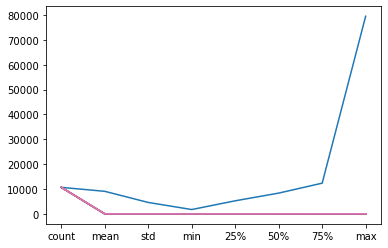

In [37]:
plt.plot(df_train.describe())

# Correlation

In [38]:
df_train.corr()

,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Price,1.000000,-0.153738,-0.103651,0.024264,-0.086155,0.508672,-0.124874
Journey_day,-0.153738,1.000000,-0.038378,-0.003192,-0.017511,-0.022181,-0.008996
Journey_month,-0.103651,-0.038378,1.000000,-0.003941,-0.100626,0.016175,-0.040880
Arrival_hour,0.024264,-0.003192,-0.003941,1.000000,-0.154362,0.055180,-0.118345
Arrival_min,-0.086155,-0.017511,-0.100626,-0.154362,1.000000,-0.074439,0.151626
Duration_hours,0.508672,-0.022181,0.016175,0.055180,-0.074439,1.000000,-0.126355
Duration_mins,-0.124874,-0.008996,-0.040880,-0.118345,0.151626,-0.126355,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

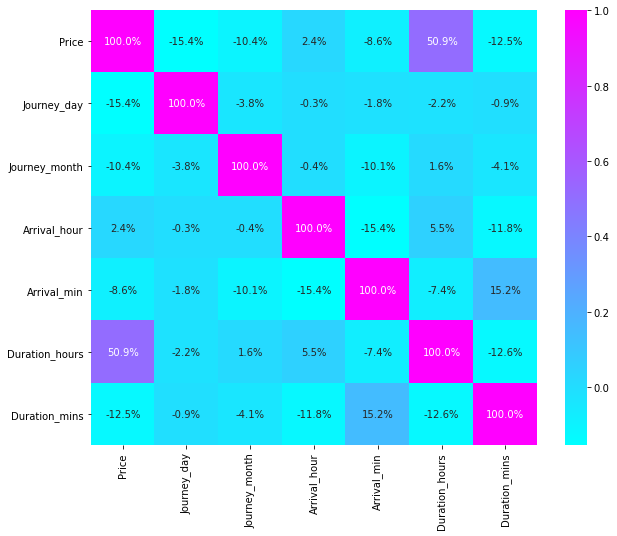

In [39]:

plt.figure(figsize = (10,8))
sns.heatmap(df_train
            .corr(), annot = True, cmap = "cool",fmt='0.1%')

plt.show()

# Data Distribution


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

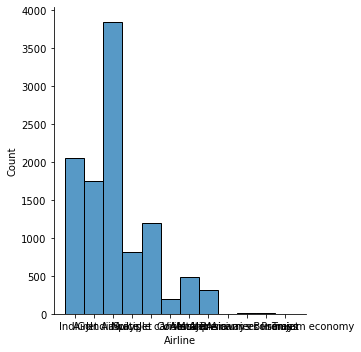

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

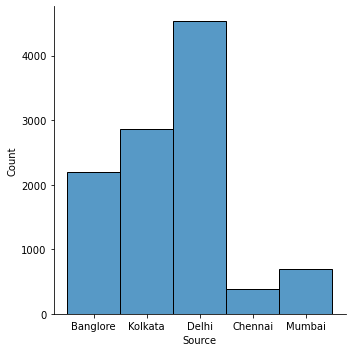

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

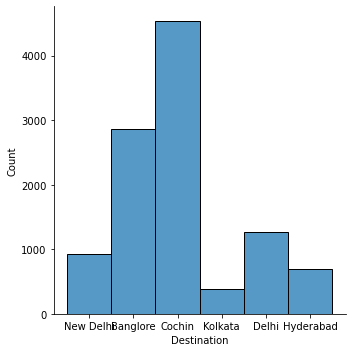

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

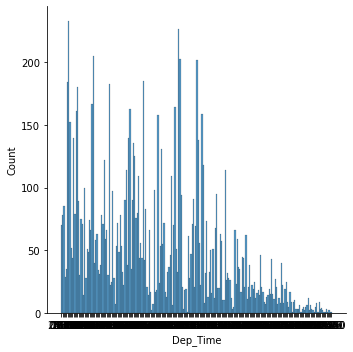

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

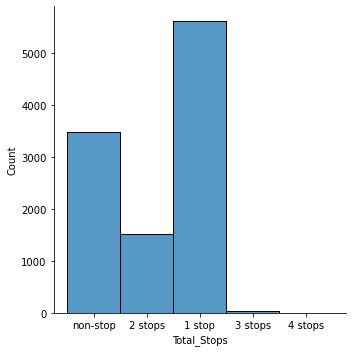

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

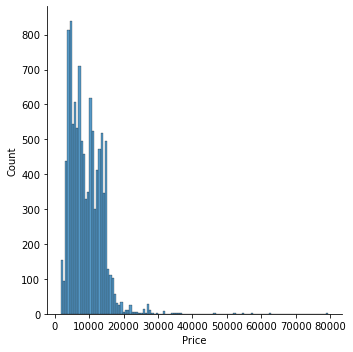

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

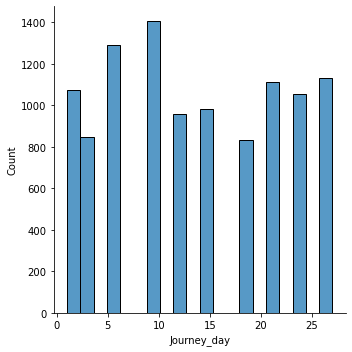

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

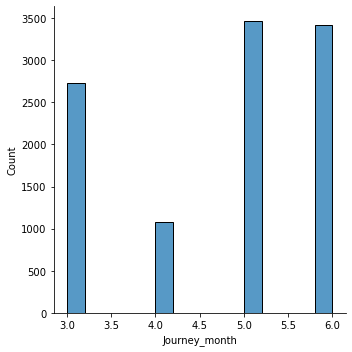

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

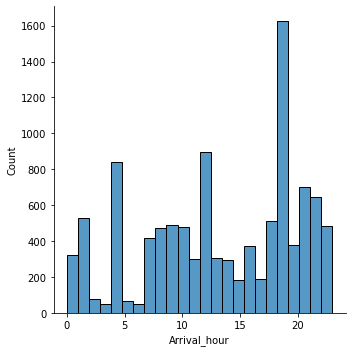

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

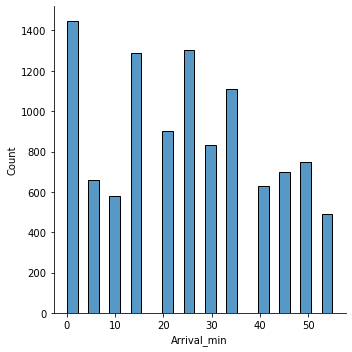

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

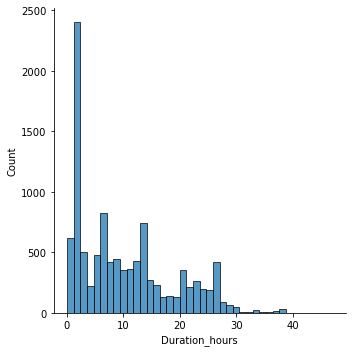

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

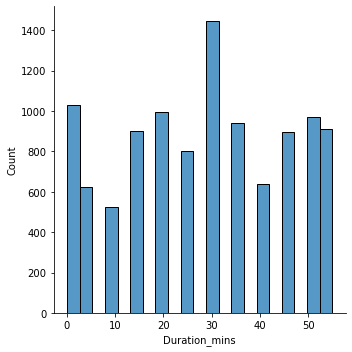

In [40]:
for i in df_train.columns:

    sns.displot(df_train[i])
    plt.show()

# Data visulization



# Univariant Analysis

In [41]:
df_train.dtypes

Airline           object
Source            object
Destination       object
Dep_Time          object
Total_Stops       object
Price              int64
Journey_day        int64
Journey_month      int64
Arrival_hour       int64
Arrival_min        int64
Duration_hours     int64
Duration_mins      int64
dtype: object

# Airline

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

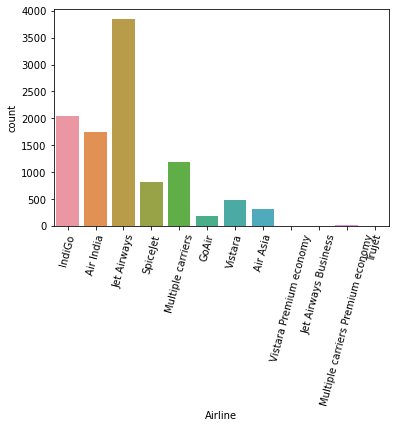

In [42]:
sns.countplot(x='Airline',data=df_train)
plt.xticks(rotation=75)
plt.show()

# Source

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

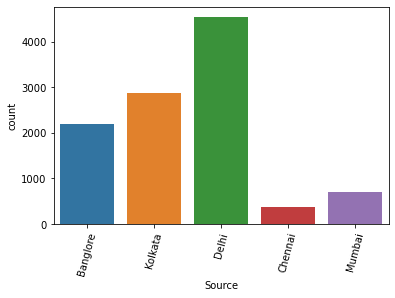

In [43]:
sns.countplot(x='Source',data=df_train)
plt.xticks(rotation=75)
plt.show()

# Destination

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

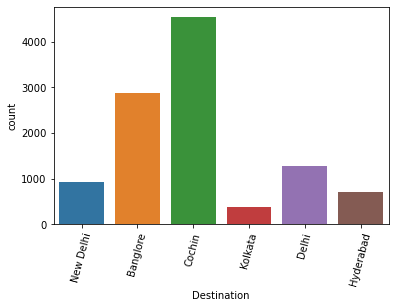

In [44]:
sns.countplot(x='Destination',data=df_train)
plt.xticks(rotation=75)
plt.show()

# Total_Stops

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

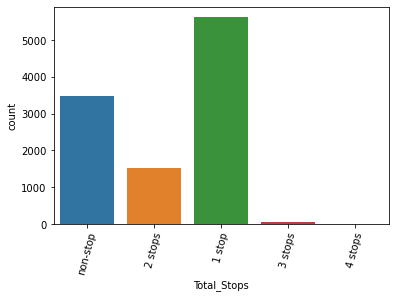

In [45]:
sns.countplot(x='Total_Stops',data=df_train)
plt.xticks(rotation=75)
plt.show()

# Price

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Price'>

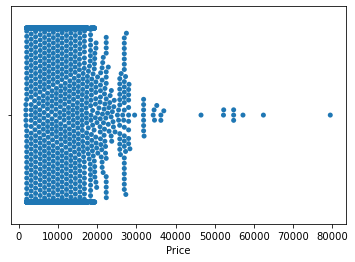

In [46]:
sns.swarmplot(x='Price',data=df_train)

In [47]:
    df_train.columns

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_mins'],
      dtype='object')

# Journey_day

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

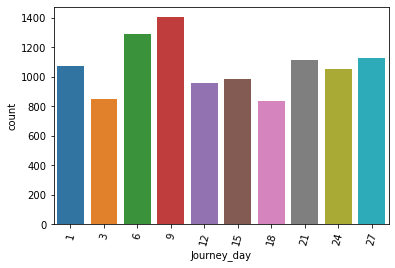

In [48]:
sns.countplot(x='Journey_day',data=df_train)
plt.xticks(rotation=75)
plt.show()

# Journey_month

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

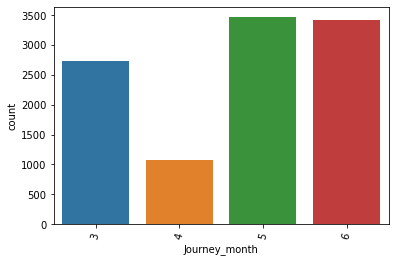

In [49]:
sns.countplot(x='Journey_month',data=df_train)
plt.xticks(rotation=75)
plt.show()

# Arrival_hour

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

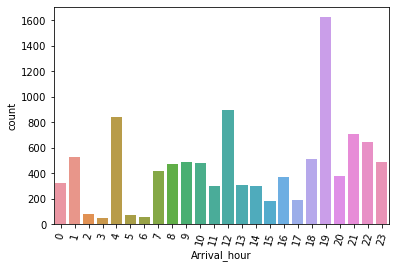

In [50]:
sns.countplot(x='Arrival_hour',data=df_train)
plt.xticks(rotation=75)
plt.show()

# Arrival_min

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

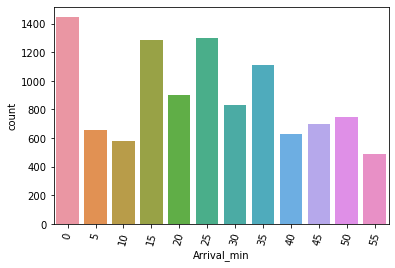

In [51]:
sns.countplot(x='Arrival_min',data=df_train)
plt.xticks(rotation=75)
plt.show()

# Duration_hours

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

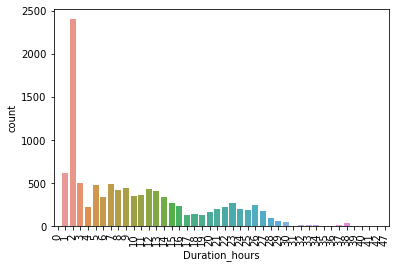

In [52]:
sns.countplot(x='Duration_hours',data=df_train)
plt.xticks(rotation=90)
plt.show()

# Duration_mins

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

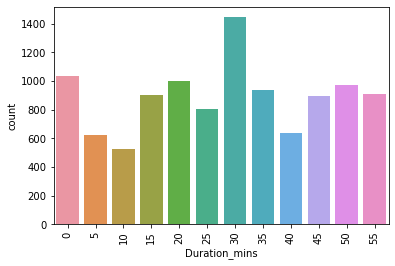

In [53]:
sns.countplot(x='Duration_mins',data=df_train)
plt.xticks(rotation=90)
plt.show()

# Bai Variants Analysis

# Airline vs Price

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

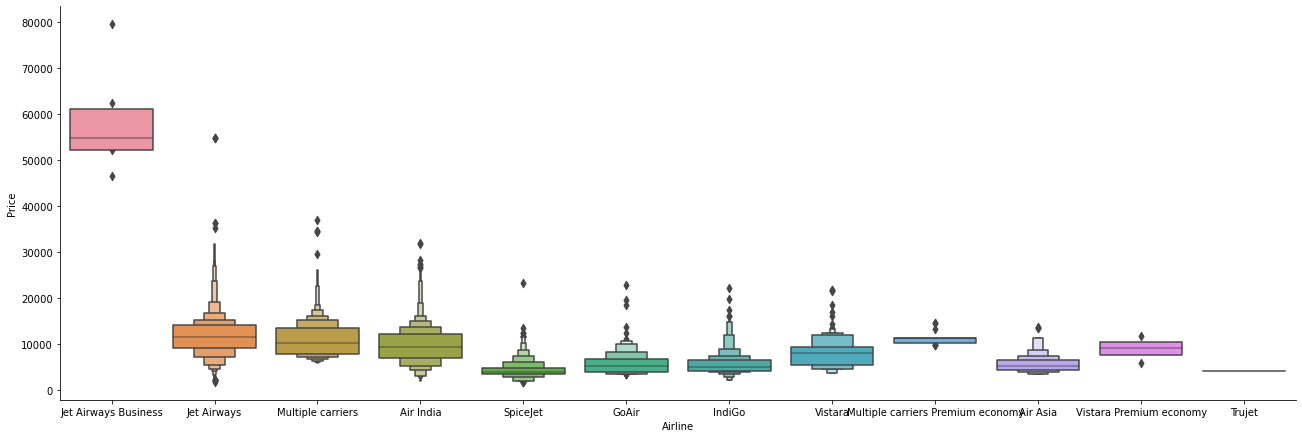

In [54]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

# Source vs Price

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

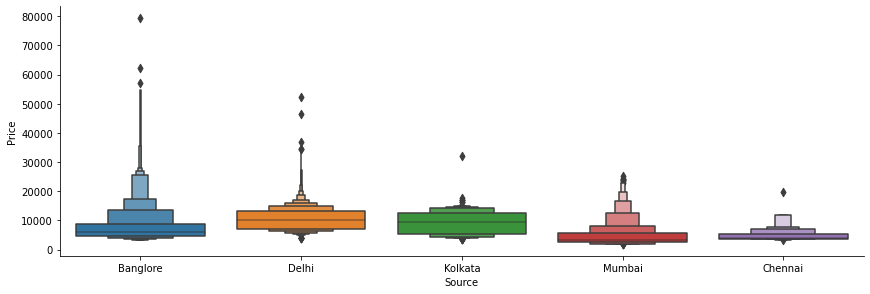

In [55]:
sns.catplot(y = "Price", x = "Source", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

# Destination vs Price

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

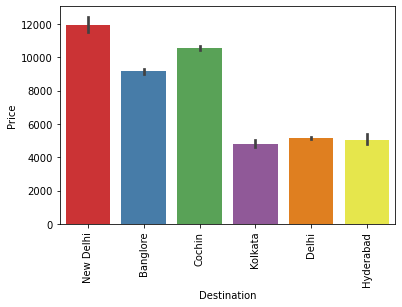

In [56]:
sns.barplot(x='Destination',y='Price',data=df_train,dodge=True,palette='Set1')
plt.xticks(rotation=90)
plt.show()

# Total_Stops vs Price

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

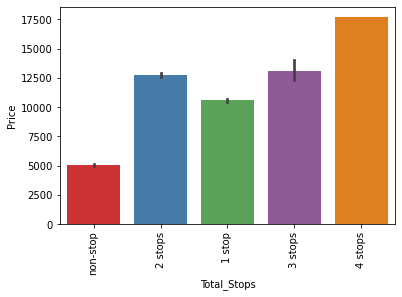

In [57]:
sns.barplot(x='Total_Stops',y='Price',data=df_train,dodge=True,palette='Set1')
plt.xticks(rotation=90)
plt.show()

# Journey_day vs Price

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

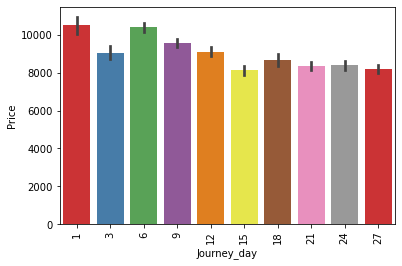

In [58]:
sns.barplot(x='Journey_day',y='Price',data=df_train,dodge=True,palette='Set1')
plt.xticks(rotation=90)
plt.show()

# Journey_month vs Price

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

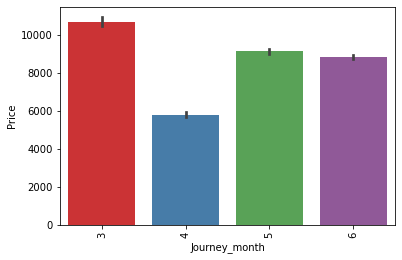

In [59]:
sns.barplot(x='Journey_month',y='Price',data=df_train,dodge=True,palette='Set1')
plt.xticks(rotation=90)
plt.show()

# Arrival_hour vs Price

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

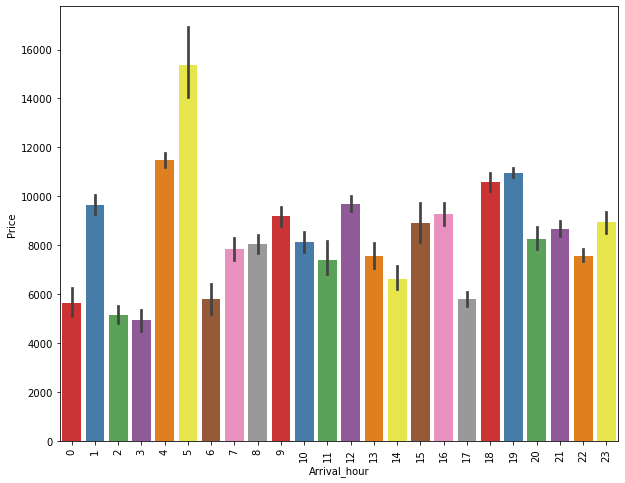

In [60]:
plt.figure(figsize = (10,8))
sns.barplot(x='Arrival_hour',y='Price',data=df_train,dodge=True,palette='Set1')
plt.xticks(rotation=90)
plt.show()

# Arrival_min vs Price

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

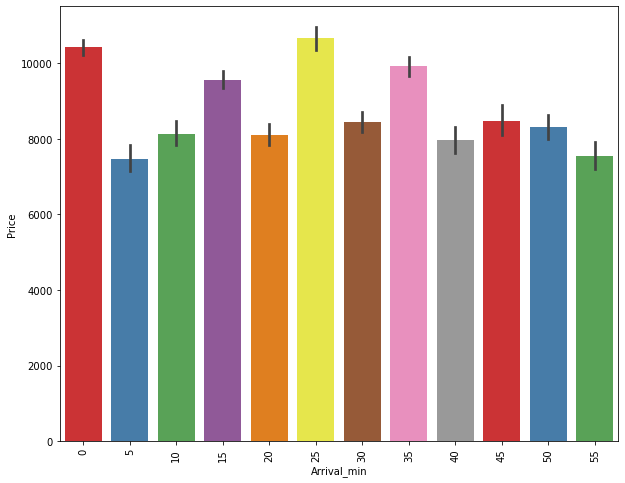

In [61]:
plt.figure(figsize = (10,8))
sns.barplot(x='Arrival_min',y='Price',data=df_train,dodge=True,palette='Set1')
plt.xticks(rotation=90)
plt.show()

# Duration_hours vs price

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

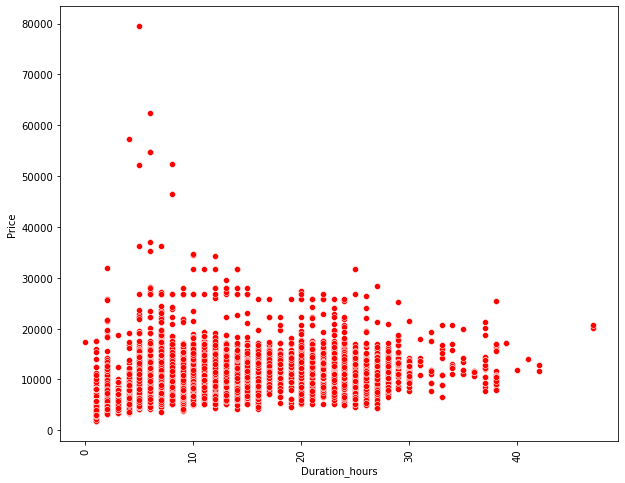

In [62]:
plt.figure(figsize = (10,8))
sns.scatterplot(x='Duration_hours',y='Price',data=df_train,color='r')
plt.xticks(rotation=90)
plt.show()

# Duration_mins vs Price

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

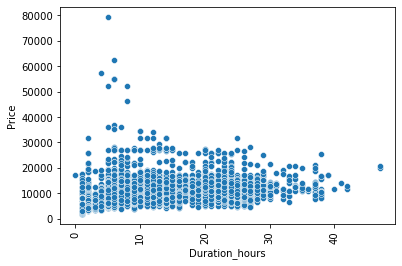

In [63]:
sns.scatterplot(x='Duration_hours',y='Price',data=df_train)
plt.xticks(rotation=90)
plt.show()

# Data Preprocessing

In [64]:
df_train.dtypes

Airline           object
Source            object
Destination       object
Dep_Time          object
Total_Stops       object
Price              int64
Journey_day        int64
Journey_month      int64
Arrival_hour       int64
Arrival_min        int64
Duration_hours     int64
Duration_mins      int64
dtype: object

In [65]:
df_train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Airline

In [66]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df_train[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

<IPython.core.display.Javascript object>

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [67]:
Airline.shape

(10683, 11)

Source

In [68]:
df_train["Source"].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [69]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df_train[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)
print("shape of Source is →",Source.shape)

Source.head()

<IPython.core.display.Javascript object>

shape of Source is → (10683, 4)


,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


Destination

In [70]:
df_train["Destination"].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [71]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df_train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

print("shape of Destination →",Destination.shape)

Destination.head()

<IPython.core.display.Javascript object>

shape of Destination → (10683, 5)


,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [72]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

df_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [73]:
#lets concat all the Data Set 
df_train=pd.concat([df_train, Airline, Source, Destination], axis = 1)

<IPython.core.display.Javascript object>

In [74]:
df_train.head()

,Airline,Source,Destination,Dep_Time,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,22:20,0,3897,24,3,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,05:50,2,7662,1,5,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,09:25,2,13882,9,6,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,18:05,1,6218,12,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,16:50,1,13302,1,3,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [75]:
#sence we alredy conver to the numeric value of the below columns so thses columns are not required for us now.
#columns="Airline", "Source", "Destination"


#Dropping the Above Mention columns
df_train.drop(["Airline", "Source", "Destination","Dep_Time"], axis = 1, inplace = True)

In [76]:
df_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [77]:
#checking the Shape of our final Data set .
df_train.shape

(10683, 28)

# now time for test data

In [78]:
df_test=pd.read_excel("C:/Users/Ranjit M/Downloads/Flight_Ticket_Participant_Datasets-20190305T100527Z-001 (1)/Flight_Ticket_Participant_Datasets/Test_set.xlsx")

<IPython.core.display.Javascript object>

In [79]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [80]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(df_test.info())

print()
print()

print("Null values :")
print("-"*75)
df_test.dropna(inplace = True)
print(df_test.isnull().sum())

# EDA

# Date_of_Journey
df_test["Journey_day"] = pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.day
df_test["Journey_month"] = pd.to_datetime(df_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
df_test["Dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute
df_test.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
df_test["Arrival_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test["Arrival_min"] = pd.to_datetime(df_test.Arrival_Time).dt.minute
df_test.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
df_test["Duration_hours"] = duration_hours
df_test["Duration_mins"] = duration_mins
df_test.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(df_test["Airline"].value_counts())
Airline = pd.get_dummies(df_test["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(df_test["Source"].value_counts())
Source = pd.get_dummies(df_test["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(df_test["Destination"].value_counts())
Destination = pd.get_dummies(df_test["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
df_test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([df_test, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)



Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Airline
---------------------------------------------------------------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64


<IPython.core.display.Javascript object>


Source
---------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


<IPython.core.display.Javascript object>


Destination
---------------------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



Shape of test data :  (2671, 28)


In [81]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [82]:
df_train.shape#train dataset shape

(10683, 28)

In [83]:
data_test.shape #test data shape

(2671, 28)

In [84]:
x=df_train.drop(['Price'],axis=1)
y=df_train[['Price']]

In [85]:
x.dtypes

Total_Stops                                  int64
Journey_day                                  int64
Journey_month                                int64
Arrival_hour                                 int64
Arrival_min                                  int64
Duration_hours                               int64
Duration_mins                                int64
Airline_Air India                            uint8
Airline_GoAir                                uint8
Airline_IndiGo                               uint8
Airline_Jet Airways                          uint8
Airline_Jet Airways Business                 uint8
Airline_Multiple carriers                    uint8
Airline_Multiple carriers Premium economy    uint8
Airline_SpiceJet                             uint8
Airline_Trujet                               uint8
Airline_Vistara                              uint8
Airline_Vistara Premium economy              uint8
Source_Chennai                               uint8
Source_Delhi                   

In [86]:
y.shape

(10683, 1)

# Feature selection

In [87]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

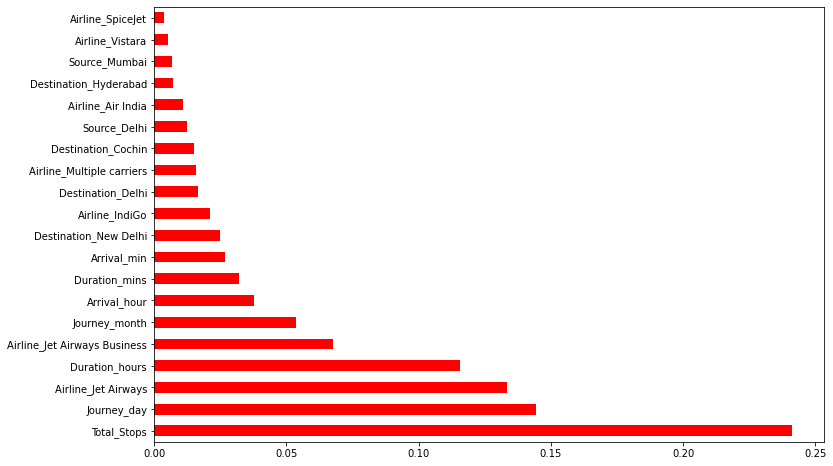

In [88]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh',color='r')
plt.show()

# Data scalling 

In [89]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)

<IPython.core.display.Javascript object>

In [90]:
x

,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,-1.220744,1.237383,-1.467490,-1.800427,-0.890057,-0.970698,1.279008,-0.442912,-0.135998,2.050269,-0.750475,-0.023706,-0.35506,-0.034905,-0.287957,-0.009676,-0.216662,-0.01676,-0.19231,-0.859188,-0.606227,-0.264193,-0.859188,-0.366493,-0.264193,-0.19231,3.234571
1,1.741483,-1.475239,0.250276,-0.050851,-0.587124,-0.382117,-0.196388,2.257787,-0.135998,-0.487741,-0.750475,-0.023706,-0.35506,-0.034905,-0.287957,-0.009676,-0.216662,-0.01676,-0.19231,-0.859188,1.649546,-0.264193,-0.859188,-0.366493,-0.264193,-0.19231,-0.309160
2,1.741483,-0.531719,1.109160,-1.363033,0.018744,1.030476,-1.671784,-0.442912,-0.135998,-0.487741,1.332489,-0.023706,-0.35506,-0.034905,-0.287957,-0.009676,-0.216662,-0.01676,-0.19231,1.163890,-0.606227,-0.264193,1.163890,-0.366493,-0.264193,-0.19231,-0.309160
3,0.260370,-0.177898,0.250276,1.407129,0.321677,-0.617549,-0.196388,-0.442912,-0.135998,2.050269,-0.750475,-0.023706,-0.35506,-0.034905,-0.287957,-0.009676,-0.216662,-0.01676,-0.19231,-0.859188,1.649546,-0.264193,-0.859188,-0.366493,-0.264193,-0.19231,-0.309160
4,0.260370,-1.475239,-1.467490,1.115533,0.624611,-0.735265,0.983929,-0.442912,-0.135998,2.050269,-0.750475,-0.023706,-0.35506,-0.034905,-0.287957,-0.009676,-0.216662,-0.01676,-0.19231,-0.859188,-0.606227,-0.264193,-0.859188,-0.366493,-0.264193,-0.19231,3.234571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,-1.220744,-0.531719,-0.608607,1.261331,0.018744,-0.970698,0.098691,-0.442912,-0.135998,-0.487741,-0.750475,-0.023706,-0.35506,-0.034905,-0.287957,-0.009676,-0.216662,-0.01676,-0.19231,-0.859188,1.649546,-0.264193,-0.859188,-0.366493,-0.264193,-0.19231,-0.309160
10679,-1.220744,1.591203,-0.608607,1.407129,-0.284190,-0.970698,0.393770,2.257787,-0.135998,-0.487741,-0.750475,-0.023706,-0.35506,-0.034905,-0.287957,-0.009676,-0.216662,-0.01676,-0.19231,-0.859188,1.649546,-0.264193,-0.859188,-0.366493,-0.264193,-0.19231,-0.309160
10680,-1.220744,1.591203,-0.608607,-0.342447,-0.284190,-0.852981,-1.671784,-0.442912,-0.135998,-0.487741,1.332489,-0.023706,-0.35506,-0.034905,-0.287957,-0.009676,-0.216662,-0.01676,-0.19231,-0.859188,-0.606227,-0.264193,-0.859188,2.728564,-0.264193,-0.19231,-0.309160
10681,-1.220744,-1.475239,-1.467490,0.094947,-0.890057,-0.970698,0.688849,-0.442912,-0.135998,-0.487741,-0.750475,-0.023706,-0.35506,-0.034905,-0.287957,-0.009676,4.615486,-0.01676,-0.19231,-0.859188,-0.606227,-0.264193,-0.859188,-0.366493,-0.264193,-0.19231,3.234571


In [91]:
#spliting the Dataset

from sklearn.model_selection import train_test_split

In [92]:
import math
final_random_state=[]#results will be append 
regressor=[]#results will be append 
Highest_acc=[]#results will be append 
MSE=[]#results will be append 
MAE=[]#results will be append 
RMSE=[]#results will be append 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
def max_r2score(rgr,x,y):
    max_acc=0
    for rd in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rd,test_size=0.20)
        rgr.fit(x_train,y_train)
        prd=rgr.predict(x_test)
        acc=r2_score(y_test,prd)
        if acc>max_acc:
            max_acc=acc
            final_rd=rd
    mse=mean_squared_error(y_test,prd)#mean_squared_error
    mae=mean_absolute_error(y_test,prd)#mean_absolute_error
    rmse=math.sqrt(mse)#Root Mean Square Error
    print("max ccuracy score coresponding to ",final_rd,"♫is♫",max_acc*100)
    print("Mean_Squared_Error is: ",mse)
    print("Mean_Absolute_Error is: ",mae)
    print("Root Mean_Squared_Error is: ",rmse)
    final_random_state.append(final_rd)
    regressor.append(rgr)
    Highest_acc.append(max_acc*100)
    MSE.append(mse)
    MAE.append(mae)
    RMSE.append(rmse)
    return final_rd

In [93]:
from sklearn.model_selection import cross_val_score
Actual=[]
def kfld(model,x,y):
    cs=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("mean inaccuracy_score for ♫",model,"♫",cs.mean())
    print("standard deviation inaccuracy_score for ♫",model,"♫",cs.std())
    Actual.append(cs.mean())

In [94]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [95]:
max_r2score(lr,x,y)

max ccuracy score coresponding to  58 ♫is♫ 67.34883600625896
Mean_Squared_Error is:  7406997.295263507
Mean_Absolute_Error is:  1934.3205763296103
Root Mean_Squared_Error is:  2721.5799263044814


58

In [96]:
kfld(lr,x,y)

mean inaccuracy_score for ♫ LinearRegression() ♫ -2.4065185182008974e+21
standard deviation inaccuracy_score for ♫ LinearRegression() ♫ 4.813037036401795e+21


In [99]:
from sklearn.model_selection import cross_val_predict
def cvs_predict(rgr):
    predicted = cross_val_predict(rgr, x, y, cv=10)
    fig, ax = plt.subplots()
    ax.scatter(y, predicted, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

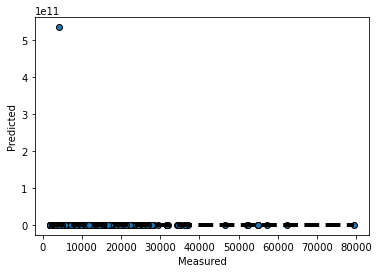

In [100]:
cvs_predict(lr)

# KNeighborsRegressor

In [101]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
from sklearn.model_selection import GridSearchCV

In [102]:
params={'n_neighbors':range(1,26,2)}
grd_knr=GridSearchCV(knr,params,scoring='r2',cv=10)
grd_knr.fit(x,y)
grd_knr.best_params_

{'n_neighbors': 5}

In [103]:
knr_final=KNeighborsRegressor(n_neighbors=5)
max_r2score(knr_final,x,y)

max ccuracy score coresponding to  76 ♫is♫ 81.90042129664785
Mean_Squared_Error is:  4369440.327599439
Mean_Absolute_Error is:  1371.157136172204
Root Mean_Squared_Error is:  2090.3206279419046


76

In [104]:
kfld(knr_final,x,y)

mean inaccuracy_score for ♫ KNeighborsRegressor() ♫ 0.7713845200432049
standard deviation inaccuracy_score for ♫ KNeighborsRegressor() ♫ 0.0053038865225984765


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

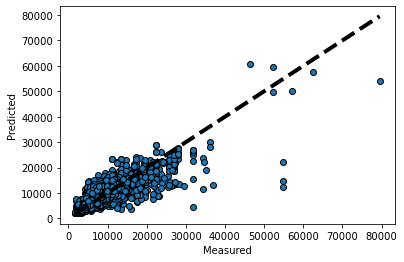

In [105]:
cvs_predict(knr_final)

# Support Vector regressor

In [106]:
from sklearn.svm import SVR
svr=SVR()

In [109]:
params={'kernel':['linear','poly','rbf','sigmoid'],'C':[0.0001,0.001,0.01,0.1,1.0]}
grd_svr=GridSearchCV(svr,params,cv=10,scoring='r2')
grd_svr.fit(x,y)
grd_svr.best_params_

{'C': 1.0, 'kernel': 'linear'}

In [110]:
svr_final=SVR(C=1.0,kernel='linear')
max_r2score(svr_final,x,y)

max ccuracy score coresponding to  64 ♫is♫ 57.559537888575065
Mean_Squared_Error is:  8841517.47531145
Mean_Absolute_Error is:  1958.2882662444106
Root Mean_Squared_Error is:  2973.468929602502


64

In [111]:
kfld(svr_final,x,y)

mean inaccuracy_score for ♫ SVR(kernel='linear') ♫ 0.521344337612268
standard deviation inaccuracy_score for ♫ SVR(kernel='linear') ♫ 0.009199198926033358


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

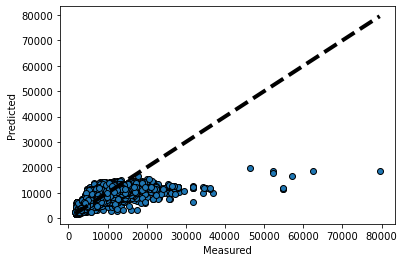

In [112]:
cvs_predict(svr_final)

# Random forest regressor

In [113]:
from sklearn.ensemble import *


In [115]:
rfr_final=RandomForestRegressor()
max_r2score(rfr_final,x,y)

max ccuracy score coresponding to  61 ♫is♫ 84.21929495248644
Mean_Squared_Error is:  3843659.4744541603
Mean_Absolute_Error is:  1233.5475500122634
Root Mean_Squared_Error is:  1960.5253057418463


61

In [116]:
kfld(rfr_final,x,y)

mean inaccuracy_score for ♫ RandomForestRegressor() ♫ 0.8136355475219581
standard deviation inaccuracy_score for ♫ RandomForestRegressor() ♫ 0.028964408538777593


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

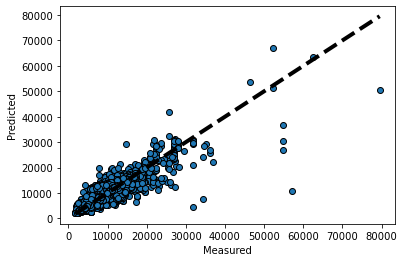

In [117]:
cvs_predict(rfr_final)

# XGboost

In [119]:
from xgboost import XGBRegressor

In [120]:
xgb=XGBRegressor()
max_r2score(xgb,x,y)

max ccuracy score coresponding to  79 ♫is♫ 87.88282547386447
Mean_Squared_Error is:  3235637.251181048
Mean_Absolute_Error is:  1182.6168087221608
Root Mean_Squared_Error is:  1798.787717097559


79

In [121]:
kfld(xgb,x,y)

mean inaccuracy_score for ♫ XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) ♫ 0.8488111380247254
standard deviation inaccuracy_score for ♫ XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_con

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

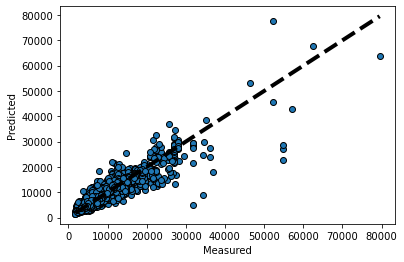

In [122]:
cvs_predict(xgb)

# AdaBoostRegressor

In [123]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
max_r2score(ada,x,y)

max ccuracy score coresponding to  63 ♫is♫ 53.6752409331346
Mean_Squared_Error is:  18569513.732327122
Mean_Absolute_Error is:  3664.1433853692665
Root Mean_Squared_Error is:  4309.235864086245


63

In [124]:
kfld(ada,x,y)

mean inaccuracy_score for ♫ AdaBoostRegressor() ♫ 0.31309828751080016
standard deviation inaccuracy_score for ♫ AdaBoostRegressor() ♫ 0.17116322129747424


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

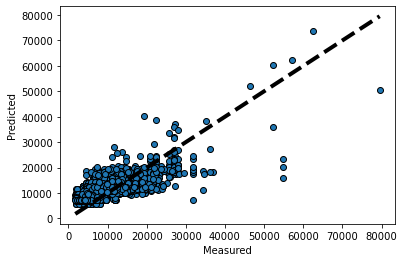

In [125]:
cvs_predict(ada)

# BaggingRegressor

In [126]:
bag=BaggingRegressor()
max_r2score(bag,x,y)

max ccuracy score coresponding to  71 ♫is♫ 83.3225659405606
Mean_Squared_Error is:  4123716.7896520877
Mean_Absolute_Error is:  1264.5293009242098
Root Mean_Squared_Error is:  2030.6936720372396


71

In [127]:
kfld(bag,x,y)

mean inaccuracy_score for ♫ BaggingRegressor() ♫ 0.7980092005767263
standard deviation inaccuracy_score for ♫ BaggingRegressor() ♫ 0.03203085236008653


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

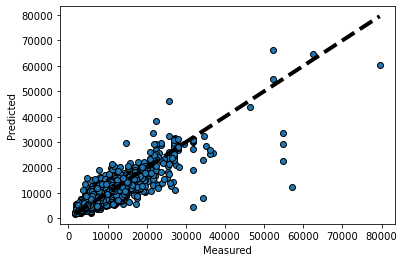

In [128]:
cvs_predict(bag)

# Gradient BoostingRegressor

In [129]:
boost=GradientBoostingRegressor()
max_r2score(boost,x,y)

max ccuracy score coresponding to  58 ♫is♫ 80.69886878586652
Mean_Squared_Error is:  4453680.942363065
Mean_Absolute_Error is:  1530.110324537989
Root Mean_Squared_Error is:  2110.374597639733


58

In [130]:
kfld(boost,x,y)

mean inaccuracy_score for ♫ GradientBoostingRegressor() ♫ 0.766289925569985
standard deviation inaccuracy_score for ♫ GradientBoostingRegressor() ♫ 0.013685535783084292


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

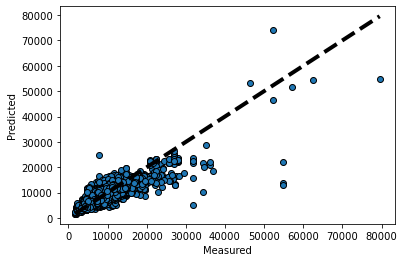

In [131]:
cvs_predict(boost)

# Result

In [132]:
result=pd.DataFrame({"Model_Name":regressor,"random_state":final_random_state,
                     "Testing_Accuray":Highest_acc,
                     "Acttual_Accuracy":Actual,"MSE":MSE,
                    "MAE":MAE,"RMSE":RMSE})

<IPython.core.display.Javascript object>

In [133]:
result

,Model_Name,random_state,Testing_Accuray,Acttual_Accuracy,MSE,MAE,RMSE
0,LinearRegression(),58,67.348836,-2.406519e+21,7.406997e+06,1934.320576,2721.579926
1,KNeighborsRegressor(),76,81.900421,7.713845e-01,4.369440e+06,1371.157136,2090.320628
2,SVR(kernel='linear'),64,57.559538,5.213443e-01,8.841517e+06,1958.288266,2973.468930
3,"(DecisionTreeRegressor(max_features='auto', ra...",61,84.219295,8.136355e-01,3.843659e+06,1233.547550,1960.525306
4,"XGBRegressor(base_score=0.5, booster='gbtree',...",79,87.882825,8.488111e-01,3.235637e+06,1182.616809,1798.787717
5,"(DecisionTreeRegressor(max_depth=3, random_sta...",63,53.675241,3.130983e-01,1.856951e+07,3664.143385,4309.235864
6,(DecisionTreeRegressor(random_state=1655084225...,71,83.322566,7.980092e-01,4.123717e+06,1264.529301,2030.693672
7,([DecisionTreeRegressor(criterion='friedman_ms...,58,80.698869,7.662899e-01,4.453681e+06,1530.110325,2110.374598


we can see XGboost Regressor is performing well so we are finalize the model with XGBOOST with 79 Random state

# making pipe line

In [135]:
#Pipe line 
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
class scaler(BaseEstimator):
    def __init__(self):
        pass
    def fit(self,documents,y=None):
        return self
    def transform(self,x_dataset):
        X=sc.fit_transform(x_dataset)
        x=pd.DataFrame(X,columns=x_dataset.columns)
        return x
        
        
        

In [196]:
xgb_final=XGBRegressor()

In [179]:
#initializing the pipe line 
pipe=Pipeline([("sc",scaler()),("XGBOOST",XGBRegressor())])

In [138]:
#checking the Pipeline
pipe

Pipeline(steps=[('sc', scaler()),
                ('XGBOOST',
                 XGBRegressor(base_score=None, booster=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, gamma=None, gpu_id=None,
                              importance_type='gain',
                              interaction_constraints=None, learning_rate=None,
                              max_delta_step=None, max_depth=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              random_state=None, reg_alpha=None,
                              reg_lambda=None, scale_pos_weight=None,
                              subsample=None, tree_method=None,
                              validate_parameters=None, verbosity=None))])

In [139]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=79,test_size=0.20)

In [140]:
x_train.shape

(8546, 27)

In [141]:
y_train.shape

(8546, 1)

In [142]:
print(x_test.shape,"\n",y_test.shape)

(2137, 27) 
 (2137, 1)


In [180]:
#fitting the data into pipeline
pipe_final=pipe.fit(x_train,y_train)

<IPython.core.display.Javascript object>

In [183]:
#prediction with x_test then test data in pipeline
pipe_final.predict(data_test)

<IPython.core.display.Javascript object>

array([ 8227.98  , 11684.4365,  7257.05  , ..., 12440.97  , 11966.3   ,
        8390.28  ])

In [166]:
xgb_final.fit(x_train,y_train)
prd=xgb_final.predict(x_test)
acc=r2_score(y_test,prd)

In [167]:
print(acc)

0.8788282547386447


In [188]:
#Saving the model
import joblib
joblib.dump(pipe_final,"flight_price_or.pkl")

['flight_price_or.pkl']

In [189]:
#load the pkl file 
model = joblib.load("flight_price_or.pkl")

In [192]:
model.predict(data_test[:10])

<IPython.core.display.Javascript object>

array([ 8714.06      , 11602.18816667,  8788.2       ,  8326.53      ,
        8632.63      ,  7426.91      , 10368.83      , 10824.93325   ,
       13627.33033333,  7188.87      ])